In [1]:
import iris
import iris.quickplot as qplt
import numpy as np
import matplotlib.pyplot as plt
iris.FUTURE.save_split_attrs = True

In [2]:
# change to your suite-id to pick up the required file
runid='du516'
# datafile including new emissions
datafile='/home/vagrant/cylc-run/u-'+runid+'/runN/work/1/atmos/atmosa.pa19810901_00'
# datafile with original emissions
ctrlfile='/home/vagrant/Tutorials/UMvn13.9/sample_output/Task04.1/atmosa.pa19810901_00'

In [3]:
# CO MMR
co_ctrl=iris.load_cube(ctrlfile,iris.AttributeConstraint(STASH='m01s34i010'))
co_expt=iris.load_cube(datafile,iris.AttributeConstraint(STASH='m01s34i010'))
# CO emissions
emico_ctrl=iris.load_cube(ctrlfile,iris.AttributeConstraint(STASH='m01s50i158'))
emico_expt=iris.load_cube(datafile,iris.AttributeConstraint(STASH='m01s50i158'))

/home/vagrant/.conda/envs/ukca/lib/python3.12/site-packages/iris/fileformats/rules.py:371: IrisUserWarning: Unable to create instance of HybridHeightFactory. The source data contains no field(s) for 'orography'.
  warnings.warn(


In [4]:
# calculate differences
co_diff=co_ctrl.copy()
co_diff.data=co_expt.data - co_ctrl.data

emico_diff=emico_ctrl.copy()
emico_diff.data=emico_expt.data - emico_ctrl.data

/home/vagrant/.conda/envs/ukca/lib/python3.12/site-packages/iris/coords.py:1980: IrisGuessBoundsWarning: Coordinate 'longitude' is not bounded, guessing contiguous bounds.
  warnings.warn(
/home/vagrant/.conda/envs/ukca/lib/python3.12/site-packages/iris/coords.py:1980: IrisGuessBoundsWarning: Coordinate 'latitude' is not bounded, guessing contiguous bounds.
  warnings.warn(


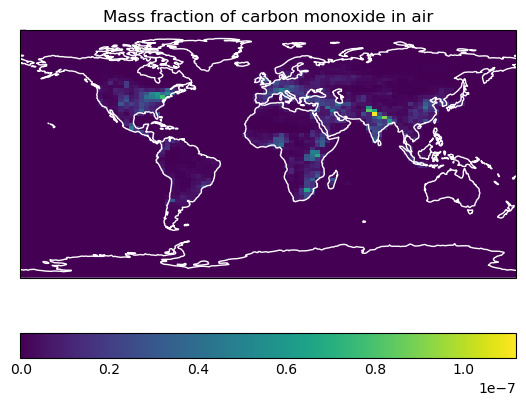

In [5]:
qplt.pcolormesh(co_diff[0,:,:])
plt.gca().coastlines(color='w')

/home/vagrant/.conda/envs/ukca/lib/python3.12/site-packages/iris/coords.py:1980: IrisGuessBoundsWarning: Coordinate 'longitude' is not bounded, guessing contiguous bounds.
  warnings.warn(
/home/vagrant/.conda/envs/ukca/lib/python3.12/site-packages/iris/coords.py:1980: IrisGuessBoundsWarning: Coordinate 'latitude' is not bounded, guessing contiguous bounds.
  warnings.warn(


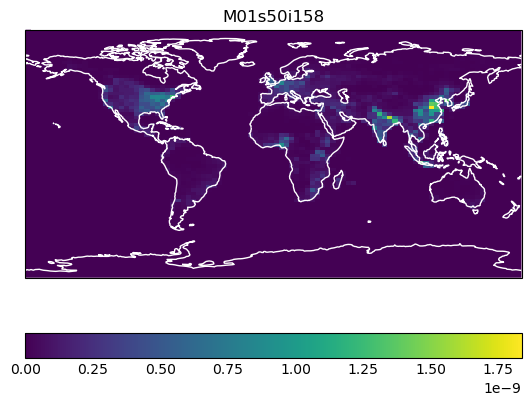

In [6]:
qplt.pcolormesh(emico_diff)
plt.gca().coastlines(color='w')

In [7]:
# output to netCDF
iris.save(co_diff,'/home/vagrant/iris_Task052_co.nc',netcdf_format='NETCDF4')
iris.save(emico_diff,'/home/vagrant/iris_Task052_emico.nc',netcdf_format='NETCDF4')